## Week 4 Lab Assignment

In [ ]:
"""RUN THIS CELL AND SKIP THIS PART OF THE CODE """
import numpy as np
import matplotlib.pyplot as plt
# Load data
def load_mnist_csv(file_path):
    data = np.loadtxt(file_path, delimiter=',', skiprows=1)
    y = data[:, 0].astype(int)
    X = data[:, 1:]
    return X, y

def visualize_loss(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()
    
def visualize_loss_two(loss_history1, loss_history2):
    plt.plot(loss_history1, label='Loss History BGD', color='blue')
    plt.plot(loss_history2, label='Loss History SGG', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.show()
    
def visualize_random_samples(X_test, y_test, svm):
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for ax in axes:
        idx = np.random.randint(0, X_test.shape[0])
        img, label = X_test[idx], y_test[idx]
        pred = svm.predict(img.reshape(1, -1))
        ax.imshow(img.reshape(28, 28), cmap='gray')
        ax.set_title(f'Correct: {label}\nPredicted: {pred[0]}')
        ax.axis('off')
    plt.show()

    


### Q1: Implement the regularization computations in the below code.
If you cannot implement the regularization computations, to be able to proceed with the other part, just use the data term loss and grad computations instead of the full computation. But missing the regularization computations you will lose 1 point.

### Q2: Implement the `train_bgd()` function in the below code. 
BGD = Batch Gradient Descent

### Q3: Implement the `train_sgd()` function in the below code.
SGD = Stochastic Gradient Descent

In [ ]:
class Classifier:
    
    def __init__(self):
        self.weights = None 
        
        
    def train(self, X_train, y_train, learning_rate=1e-7, reg=2.5e4, num_epochs=25, batch_size=200, method='sgd'):
        """
        method: if this is 'sgd' it runs the stochastic gradient descent, 
        else it runs the batch gradient descent
        batch_size: this argument is used only when the method argument is set as 'sgd'
        """
        
        num_train, dim = X_train.shape
        num_classes = np.max(y_train) + 1
        if self.weights is None:
            self.weights = 0.001 * np.random.randn(dim, num_classes)

        if method == 'sgd':
            return self.train_sgd(X_train, y_train, learning_rate, reg, num_epochs, batch_size)
        else:
            return self.train_bgd(X_train, y_train, learning_rate, reg, num_epochs)

        
    def train_sgd(self, X_train, y_train, learning_rate, reg, num_epochs, batch_size):
       
        ################
        #FOR QUESTION 2#
        #FILL          #
        ################
        loss_history = []

        for i in range(num_epochs):
            for j in range(batch_size):
                gradient = self.calculate_total_gradient(X_train, y_train,reg) 
                self.weights -= learning_rate * gradient 
                loss = self.calculate_total_loss(X_train, y_train, reg)
                loss_history.append(loss)
                print(loss)
        
        return loss_history
    

    def train_bgd(self, X_train, y_train, learning_rate, reg, num_epochs):
        
        ################
        #FOR QUESTION 3#
        #FILL          #
        ################
        
        loss_history = []
        print("debug")
        for i in range(num_epochs):
            gradient = self.calculate_total_gradient(X_train, y_train,reg) 
            self.weights -= learning_rate * gradient 
            loss = self.calculate_total_loss(X_train, y_train, reg)
            loss_history.append(loss)
            print(loss)
        return loss_history

    
    def calculate_data_loss(self, X_batch, y_batch):
        num_train = X_batch.shape[0]
        scores = X_batch.dot(self.weights)  # Compute the scores for each class.
        true_class_scores = np.zeros_like(scores)
        true_class_scores[np.arange(num_train), y_batch] = 1  # One-hot encode true labels.
        # Compute the mean square error loss.
        mse_loss = np.mean(np.square(scores - true_class_scores))
        return mse_loss

    
    def calculate_regularization_loss(self, reg):
        """
        Compute the L2 regularization loss.
        """
        ################
        #FOR QUESTION 1#
        #FILL    tmm      #
        ################
        
        weight_a = np.square(self.weights)
        #regular = weight_a * reg sonsuz?
        reg_loss = np.sum(weight_a)
        return reg_loss

    
    def calculate_total_loss(self, X_batch, y_batch, reg):
        """
        Calculate the total loss as the sum of data loss and regularization loss.
        """
        data_loss = self.calculate_data_loss(X_batch, y_batch)
        reg_loss = self.calculate_regularization_loss(reg)
        total_loss = data_loss + reg_loss
        return total_loss

    
    def calculate_data_gradient(self, X_batch, y_batch):
        num_train = X_batch.shape[0]
        scores = X_batch.dot(self.weights)  # Compute the scores for each class.
        true_class_scores = np.zeros_like(scores)
        true_class_scores[np.arange(num_train), y_batch] = 1  # One-hot encode true labels.
        # Compute the gradient of the data loss.
        dW = 2 * np.dot(X_batch.T, (scores - true_class_scores)) / num_train
        return dW

    
    def calculate_regularization_gradient(self, reg):
        """
        Compute the gradient of the L2 regularization term.
        """
        ################
        #FOR QUESTION 1#
        #FILL    tmm      #
        ################
        
        dW_reg = 2 * self.weights * reg
        return dW_reg

    
    def calculate_total_gradient(self, X_batch, y_batch, reg):
        """
        Calculate the total gradient by combining data gradient and regularization gradient.
        """
        dW_data = self.calculate_data_gradient(X_batch, y_batch)
        dW_reg = self.calculate_regularization_gradient(reg)
        dW_total = dW_data + dW_reg
        return dW_total
    
    
    def predict(self, X):
        y_pred = np.dot(X, self.weights)
        y_pred = np.argmax(y_pred, axis=1)
        return y_pred

    
    def accuracy(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)

    
    


In [ ]:
"""Load MNIST Dataset"""
X_train, y_train = load_mnist_csv('mnist_train_4k.csv')
X_test, y_test = load_mnist_csv('mnist_test_1k.csv')

debug
4.562645181187046
3.607564429739295
3.2403775944196465
3.0333132889164163
2.8761589891650146
2.739884238694966
2.6162823473588372
2.5025492404026677
2.397336156860293
2.2997330541211154
2.2090014178502178
2.124499373649605
2.045656707894548
1.9719633225312834
1.9029617170532471
1.8382410197937293
1.7774318723278764
1.7202019349782673
1.666251907210653
1.6153119947560257
1.567138769999646
1.5215123802131494
1.4782340639762992
1.4371239408625105
1.3980190435296163
Total test accuracy for Batch Gradient Descent: 16.50%


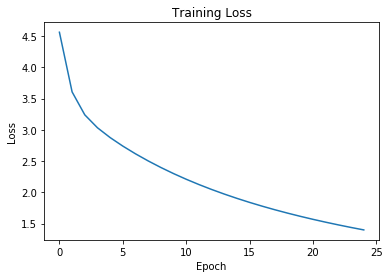

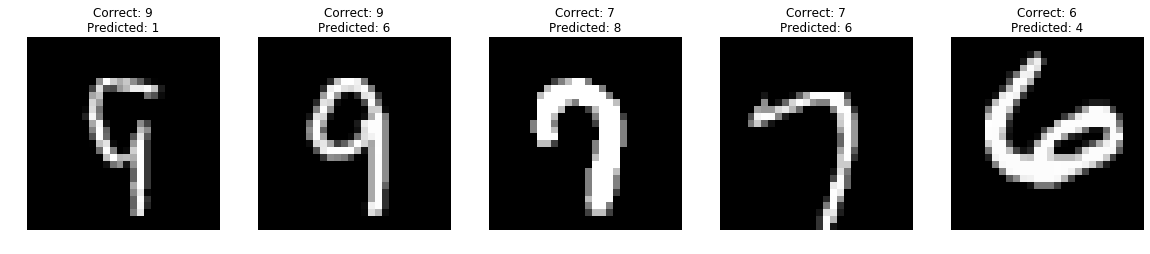

In [ ]:
"""RUN FOR Batch Gradient Descent"""
CLF_BGD = Classifier()
loss_history_BGD = CLF_BGD.train(X_train, y_train,method='mgd')
test_accuracy = CLF_BGD.accuracy(X_test, y_test)
print(f"Total test accuracy for Batch Gradient Descent: {test_accuracy * 100:.2f}%")
visualize_loss(loss_history_BGD)
visualize_random_samples(X_test, y_test, CLF_BGD)

In [ ]:
"""RUN FOR Stochastic Gradient Descent"""
CLF_SGD = Classifier()
loss_history_SGD = CLF_SGD.train(X_train, y_train, method='sgd')
test_accuracy = CLF_SGD.accuracy(X_test, y_test)
print(f"Total test accuracy for Stochastic Gradient Descent: {test_accuracy * 100:.2f}%")
visualize_loss(loss_history_SGD)
visualize_random_samples(X_test, y_test, CLF_SGD)

3.827919123353096
3.2250434896531477
2.9659832036398717
2.802620901033027
2.6708891382566735
2.553774576382793
2.446340260595811
2.346790599367535
2.2541847143738076
2.167847398857266
2.0872139138378234
2.0117860038740387
1.941116746666818
1.8748031686052766
1.812481209829128
1.7538216192444178
1.6985263828736954
1.6463255531001
1.5969744168624487
1.5502509617524598
1.5059536069653086
1.46389917051342
1.4239210474237742
1.3858675764278896
1.349600575100826
1.3149940255773584
1.281932894906242
1.2503120758246302
1.220035435267546
1.191014959292512
1.163169984315478
1.136426505637483
1.110716555206693
1.0859776414205755
1.062152244539639
1.0391873619676268
1.0170340982624737
0.9956472952858847
0.9749851983842416
0.9550091549261922
0.9356833419083564
0.9169745196852659
0.8988518091873879
0.8812864902659334
0.8642518190486651
0.8477228624103139
0.8316763478572791
0.8160905273015854
0.8009450533558201
0.7862208669209829
0.7719000949646256
0.7579659574989374
0.7444026828689315
0.731195430550

0.04977368974354106
0.0497122270421115
0.049651481457587895
0.0495914443404038
0.04953210714974254
0.04947346145209439
0.04941549891983414
0.04935821132981887
0.049301590562005636
0.049245628598088745
0.04919031752015623
0.049135649509365435
0.04908161684463717
0.049028211901368225
0.04897542715016226
0.048923255155578195
0.04887168857489643
0.048820720156902225
0.048770342740686215
0.048720549254461606
0.04867133271439802
0.04862268622347148
0.04857460297033054
0.04852707622817814
0.048480099353669
0.04843366578582243
0.04838776904495008
0.04834240273159868
0.04829756052550734
0.04825323618457927
0.048209423543867785
0.04816611651457615
0.04812330908307141
0.04808099530991158
0.04803916932888638
0.04799782534607107
0.04795695763889327
0.0479165605552126
0.0478766285124129
0.047837155996506855
0.047798137561252896
0.04775956782728405
0.047721441481248884
0.04768375327496385
0.04764649802457743
0.047609670609745476
0.04757326597281782
0.047537279118035874
0.04750170511074115
0.047466539

0.044418130933331114
0.04441744887746146
0.04441677377652408
0.04441610555638836
0.04441544414373532
0.04441478946604854
0.0444141414516053
0.04441350002946757
0.044412865129473365
0.04441223668222808
0.04441161461909589
0.044410998872191326
0.04441038937437092
0.044409786059224875
0.044409188861068996
0.04440859771493649
0.044408012556570085
0.04440743332241404
0.04440685994960637
0.04440629237597116
0.044405730540010874
0.04440517438089882
0.044404623838471734
0.04440407885322233
0.04440353936629206
0.04440300531946389
0.044402476655155114
0.04440195331641044
0.044401435246894834
0.04440092239088679
0.04440041469327144
0.04439991209953382
0.044399414555752206
0.04439892200859159
0.04439843440529707
0.04439795169368748
0.044397473822149036
0.044397000739628954
0.04439653239562935
0.04439606874020099
0.04439560972393727
0.04439515529796814
0.044394705413954225
0.04439426002408093
0.04439381908105256
0.04439338253808666
0.044392950348908305
0.04439252246774442
0.04439209884931835
0.0443

0.04434895063355761
0.04434893236218527
0.04434891422143629
0.044348896210232226
0.04434887832750469
0.044348860572195184
0.04434884294325507
0.0443488254396454
0.04434880806033689
0.044348790804309764
0.044348773670553676
0.044348756658067666
0.04434873976585995
0.04434872299294797
0.04434870633835819
0.04434868980112608
0.044348673380295946
0.04434865707492094
0.044348640884062894
0.04434862480679225
0.044348608842188025
0.044348592989337646
0.04434857724733691
0.04434856161528992
0.044348546092308955
0.04434853067751443
0.04434851537003477
0.04434850016900639
0.04434848507357356
0.04434847008288835
0.04434845519611055
0.04434844041240763
0.044348425730954585
0.04434841115093393
0.04434839667153559
0.044348382291956846
0.04434836801140223
0.04434835382908353
0.044348339744219596
0.044348325756036394
0.044348311863766865
0.04434829806665083
0.04434828436393504
0.04434827075487297
0.044348257238724854
0.04434824381475755
0.04434823048224451
0.04434821724046572
0.04434820408870763
0.044

0.044346333604032354
0.04434633203184358
0.04434633046808323
0.04434632891270386
0.044346327365658356
0.04434632582689982
0.04434632429638171
0.04434632277405774
0.0443463212598819
0.04434631975380849
0.044346318255792064
0.04434631676578746
0.04434631528374979
0.04434631380963447
0.044346312343397136
0.04434631088499374
0.04434630943438047
0.04434630799151381
0.044346306556350475
0.044346305128847484
0.04434630370896207
0.04434630229665177
0.04434630089187435
0.04434629949458785
0.04434629810475053
0.04434629672232094
0.044346295347257876
0.04434629397952037
0.04434629261906768
0.04434629126585936
0.04434628991985518
0.04434628858101514
0.04434628724929951
0.04434628592466878
0.04434628460708366
0.04434628329650514
0.044346281992894414
0.0443462806962129
0.044346279406422294
0.044346278123484434
0.044346276847361484
0.04434627557801578
0.04434627431540988
0.04434627305950659
0.044346271810268914
0.0443462705676601
0.04434626933164359
0.044346268102183055
0.044346266879242396
0.0443462

0.04434607018502187
0.04434606999628657
0.04434606980852712
0.044346069621738475
0.04434606943591564
0.0443460692510536
0.04434606906714739
0.04434606888419206
0.04434606870218271
0.04434606852111444
0.04434606834098238
0.0443460681617817
0.044346067983507584
0.04434606780615525
0.044346067629719904
0.044346067454196836
0.04434606727958131
0.04434606710586865
0.044346066933054186
0.04434606676113326
0.04434606659010129
0.044346066419953645
0.04434606625068576
0.0443460660822931
0.044346065914771145
0.044346065748115386
0.044346065582321355
0.04434606541738457
0.04434606525330064
0.04434606509006515
0.0443460649276737
0.04434606476612193
0.044346064605405515
0.04434606444552014
0.04434606428646149
0.04434606412822531
0.04434606397080735
0.04434606381420337
0.04434606365840917
0.04434606350342059
0.04434606334923343
0.044346063195843576
0.04434606304324692
0.04434606289143932
0.04434606274041673
0.04434606259017511
0.04434606244071038
0.04434606229201858
0.04434606214409567
0.04434606199

In [ ]:
"""Visualize Both Losses in the same graph"""
visualize_loss_two(loss_history_BGD, loss_history_SGD)